<a href="https://colab.research.google.com/github/ant9398/School/blob/main/Project%20on%20Car%20Insurance%20Dataset%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercice 1: Régression

In [ ]:
#Loading packages
import numpy as np
import sklearn
from sklearn import datasets
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import xgboost as xg
from xgboost import XGBRegressor

#!pip install shap
#import shap

In [ ]:
#Loading datasets

from google.colab import files
#data_train_insurance = files.upload()
data_type = files.upload()




Saving data_type.csv to data_type.csv


In [ ]:
df_type = pd.read_csv('data_type.csv', sep=';')
variable_types = dict(zip(df_type.VarName, df_type.Type))
df = pd.read_csv('data_train_insurance.csv', sep=';', dtype=variable_types, na_values='?')

FileNotFoundError: ignored

In [ ]:
df_type.head()

,VarName,Type
0,Id,object
1,Response_Market_Index,float64
2,PROD_Formula,object
3,PER_sex,object
4,PER_Sex_Second_Driver,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             9983 non-null   object 
 1   Response_Market_Index          9983 non-null   float64
 2   PROD_Formula                   9983 non-null   object 
 3   PER_sex                        9983 non-null   object 
 4   PER_Sex_Second_Driver          9983 non-null   object 
 5   VEH_Actual_Value               9983 non-null   float64
 6   CLA_HISTORY                    9933 non-null   float64
 7   CLA_HISTORY_1Y                 9933 non-null   float64
 8   CLA_HISTORY_3Y                 9933 non-null   float64
 9   CLA_BM_TPL_DECLARED            9933 non-null   float64
 10  BEH_Mileage                    9933 non-null   float64
 11  PER_KIDS_ON_BOARD_ID           9933 non-null   object 
 12  VEH_Number_of_doors            9217 non-null   f

In [ ]:
#Missing values per variables
df.isnull().sum(axis=0).reset_index()

,index,0
0,Id,0
1,Response_Market_Index,0
2,PROD_Formula,0
3,PER_sex,0
4,PER_Sex_Second_Driver,0
5,VEH_Actual_Value,0
6,CLA_HISTORY,50
7,CLA_HISTORY_1Y,50
8,CLA_HISTORY_3Y,50
9,CLA_BM_TPL_DECLARED,50


In [ ]:
#Number of observations that have atleast 1 missing value
df.isna().any(axis=1).sum()

3808

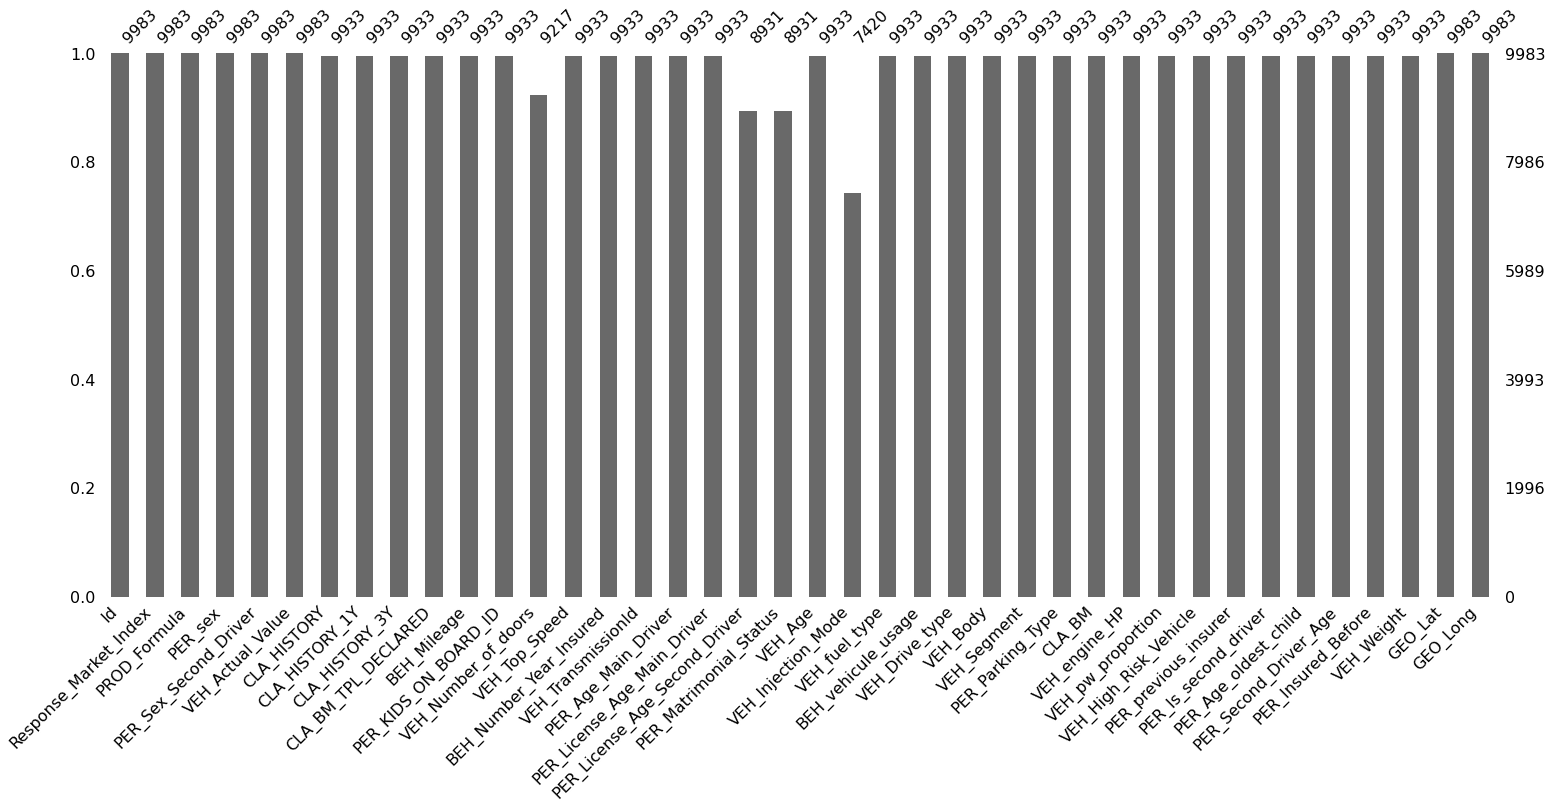

In [ ]:
msno.bar(df) #The height of the bar indicates how complete that column: vehicule injection mode is the variable that has the most of missing data.

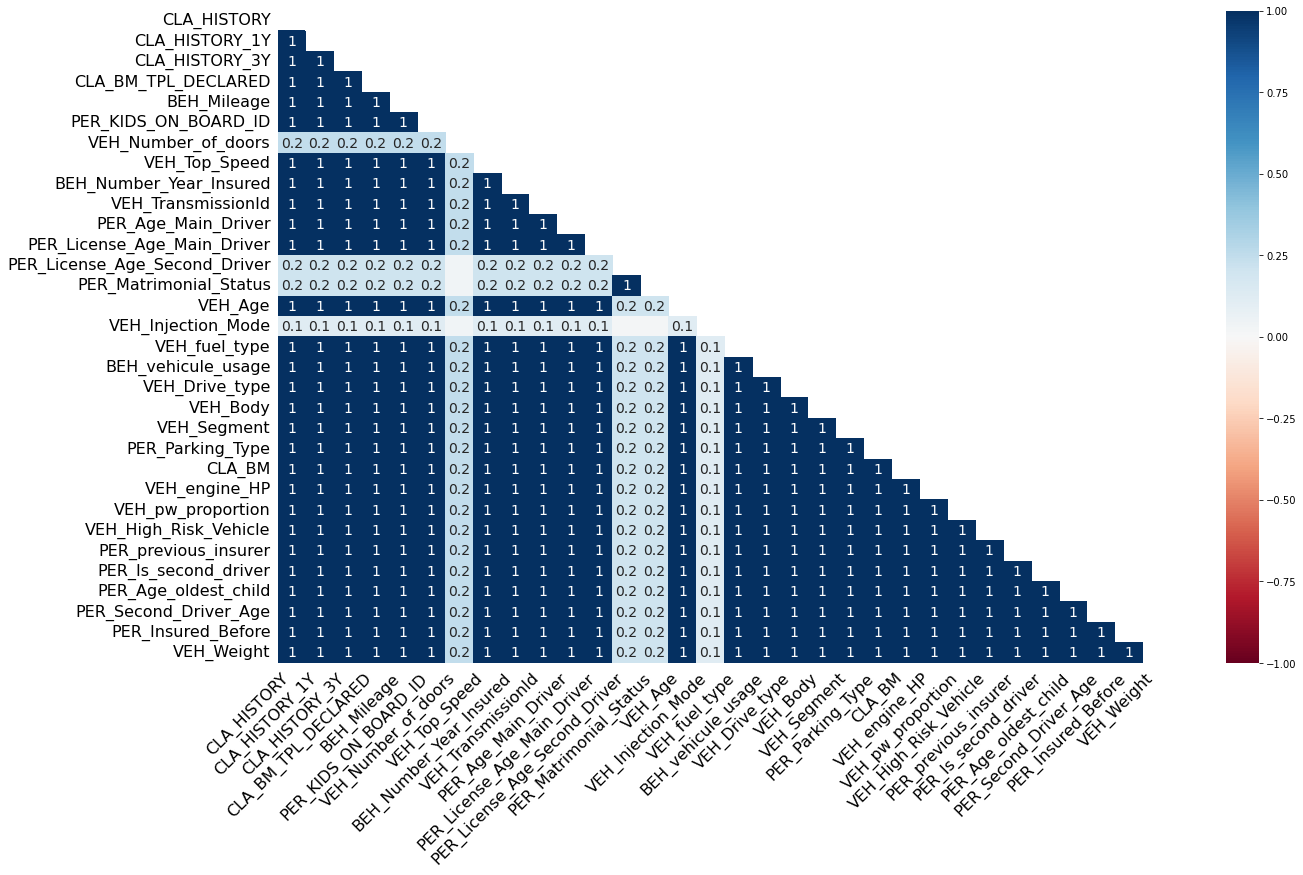

In [ ]:
msno.heatmap(df) 

Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column: in our dataset, it is the case for most of your variables which means that when there is a missing variable on a rows, then most of the times, there is multiple missing variables.

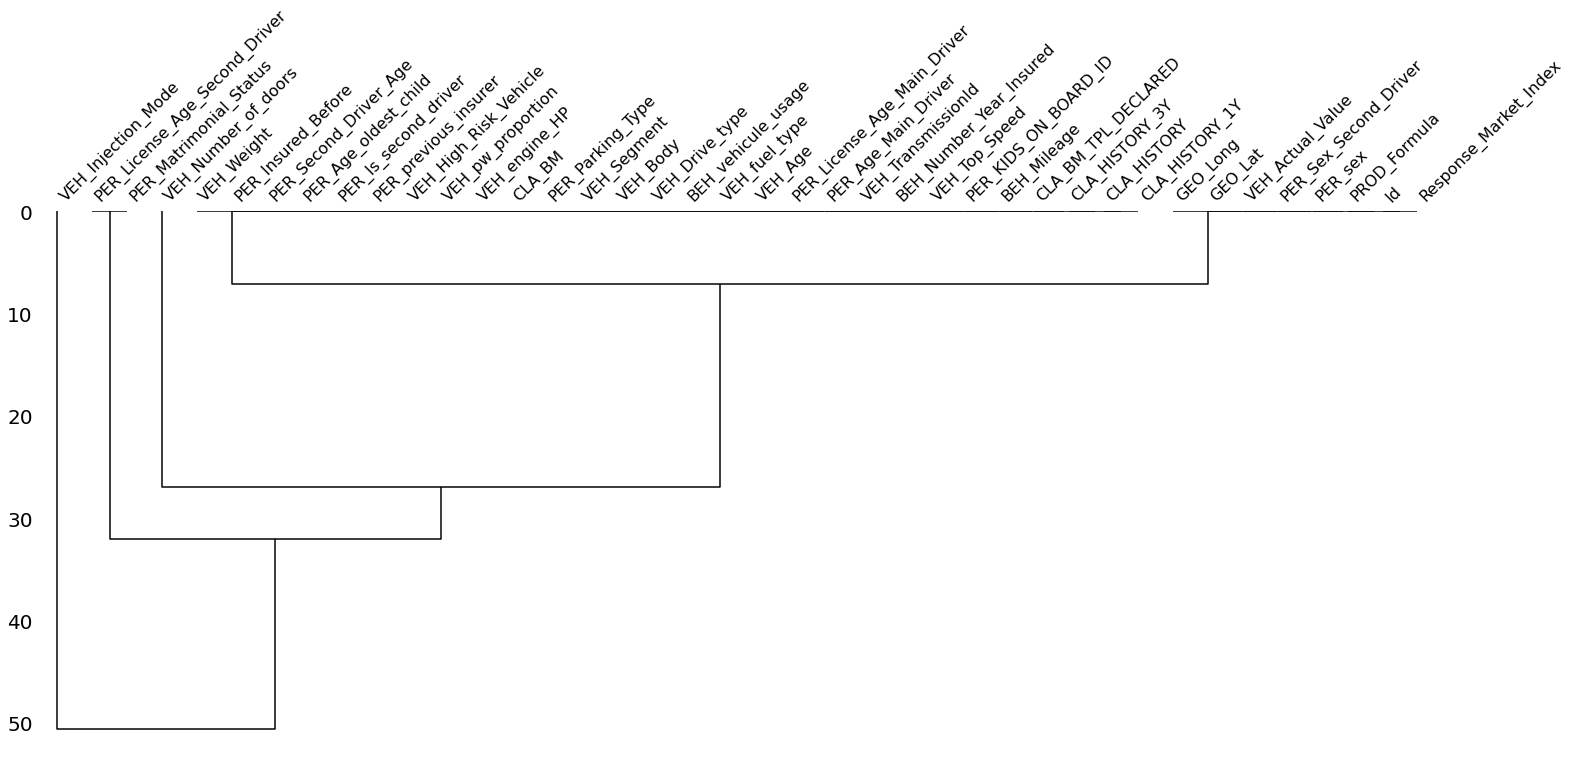

In [ ]:
msno.dendrogram(df) #If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns.

In [ ]:
#Univariate Analysis

df.describe()

,Response_Market_Index,VEH_Actual_Value,CLA_HISTORY,CLA_HISTORY_1Y,CLA_HISTORY_3Y,CLA_BM_TPL_DECLARED,BEH_Mileage,VEH_Number_of_doors,VEH_Top_Speed,BEH_Number_Year_Insured,...,PER_License_Age_Second_Driver,VEH_Age,CLA_BM,VEH_engine_HP,VEH_pw_proportion,PER_Age_oldest_child,PER_Second_Driver_Age,VEH_Weight,GEO_Lat,GEO_Long
count,9983.000000,9.983000e+03,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9217.000000,9933.000000,9933.000000,...,8931.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9983.000000,9983.000000
mean,493.635824,2.076923e+04,1.508205,1.124836,1.312393,1.646431,13.309977,4.612455,187.541830,6.478808,...,0.845482,8.788281,6.434109,116.328300,64.510823,-44.718011,4.390516,1314.165408,-0.002146,-0.007880
std,268.707675,2.473360e+04,1.949901,0.952200,1.510256,2.180726,1.016209,0.726908,24.391045,3.959938,...,5.505131,4.984428,3.768526,42.120307,14.925362,55.379085,13.076905,249.981410,1.344643,2.032372
min,162.000000,-1.765000e+03,1.000000,1.000000,1.000000,-1.000000,12.000000,2.000000,0.000000,-1.000000,...,-1.000000,0.000000,0.000000,24.000000,30.000000,-99.000000,-1.000000,600.000000,-2.440876,-4.764447
25%,341.580000,7.803000e+03,1.000000,1.000000,1.000000,1.000000,13.000000,4.000000,175.000000,3.000000,...,-1.000000,5.000000,3.000000,90.000000,55.000000,-99.000000,-1.000000,1155.000000,-1.274176,-1.547747
50%,407.070000,1.499800e+04,1.000000,1.000000,1.000000,1.000000,13.000000,5.000000,187.000000,8.000000,...,-1.000000,8.000000,7.000000,110.000000,63.000000,-99.000000,-1.000000,1318.000000,0.009124,0.002253
75%,530.000000,2.688250e+04,1.000000,1.000000,1.000000,1.000000,14.000000,5.000000,201.000000,10.000000,...,-1.000000,12.000000,10.000000,140.000000,71.000000,10.000000,-1.000000,1470.000000,0.809124,1.702253
max,2604.930000,1.132190e+06,11.000000,11.000000,11.000000,12.000000,18.000000,5.000000,325.000000,10.000000,...,47.000000,29.000000,10.000000,625.000000,304.000000,27.000000,69.000000,2475.000000,3.055324,4.902253


In [ ]:
df.describe(include=['O']) #for categorical variables

,Id,PROD_Formula,PER_sex,PER_Sex_Second_Driver,PER_KIDS_ON_BOARD_ID,VEH_TransmissionId,PER_Matrimonial_Status,VEH_Injection_Mode,VEH_fuel_type,BEH_vehicule_usage,VEH_Drive_type,VEH_Body,VEH_Segment,PER_Parking_Type,VEH_High_Risk_Vehicle,PER_previous_insurer,PER_Is_second_driver,PER_Insured_Before
count,9983,9983,9983,9983,9933,9933,8931,7420,9933,9933,9933,9933,9933,9933,9933,9933,9933,9933
unique,9983,2,2,3,3,2,4,5,2,1,8,11,8,4,2,15,2,3
top,1638099,FULL,1,0,2,7,2,389999,1,1,50001,10,30003,2,2,27,1,2
freq,1,6343,7628,8402,3840,9074,5826,3719,5506,9933,8575,4777,4212,5764,9090,1941,8365,4415


In [ ]:
categorical = df.select_dtypes('object')
numerical = df.select_dtypes('number')
df.dtypes.reset_index()

,index,0
0,Id,object
1,Response_Market_Index,float64
2,PROD_Formula,object
3,PER_sex,object
4,PER_Sex_Second_Driver,object
5,VEH_Actual_Value,float64
6,CLA_HISTORY,float64
7,CLA_HISTORY_1Y,float64
8,CLA_HISTORY_3Y,float64
9,CLA_BM_TPL_DECLARED,float64


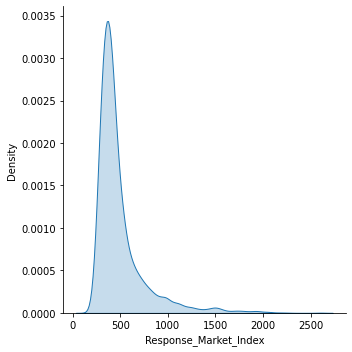

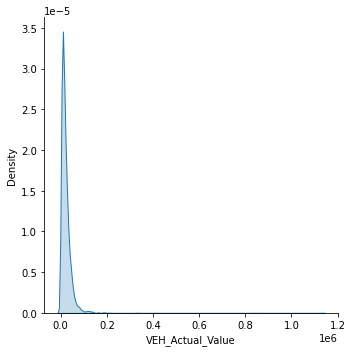

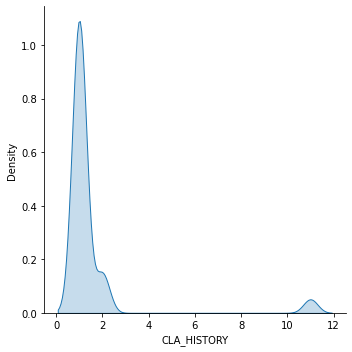

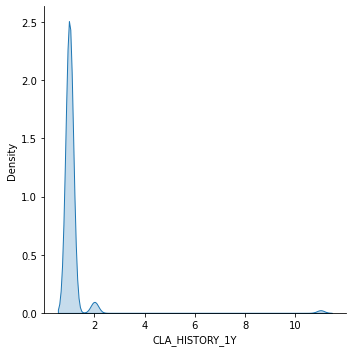

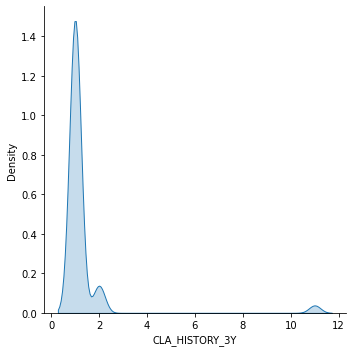

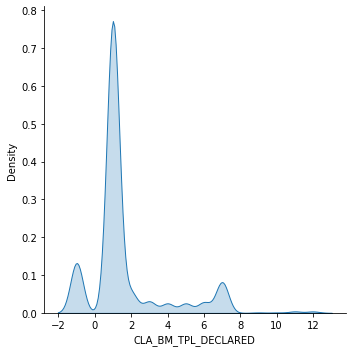

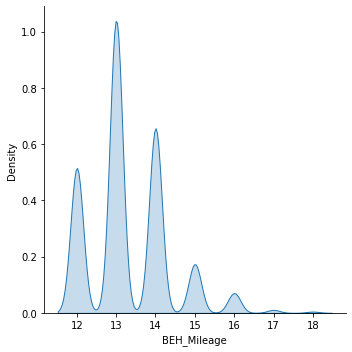

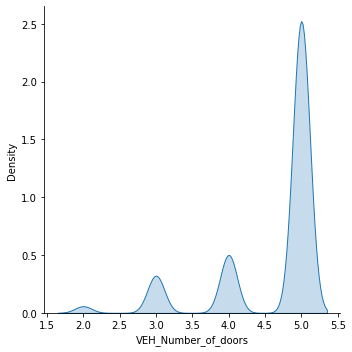

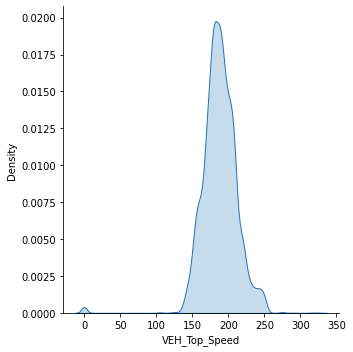

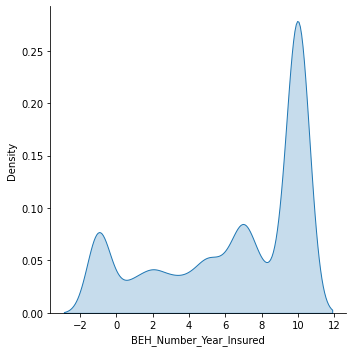

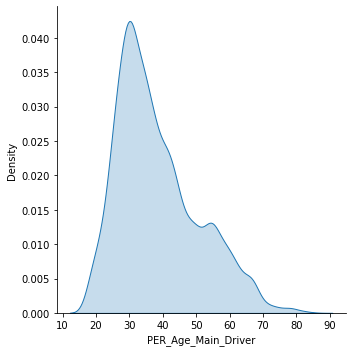

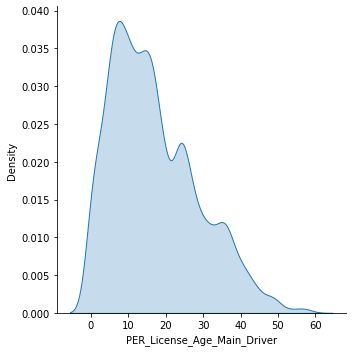

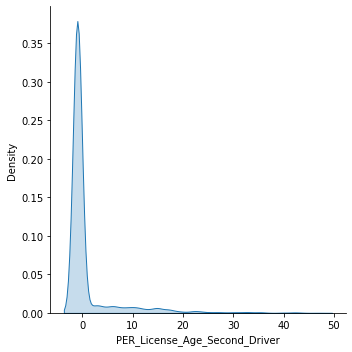

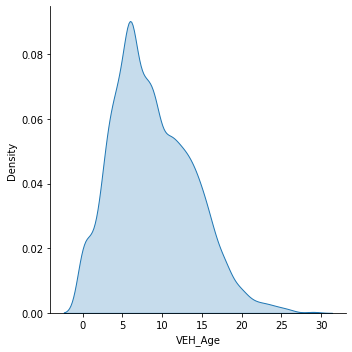

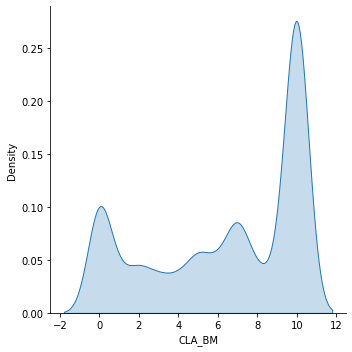

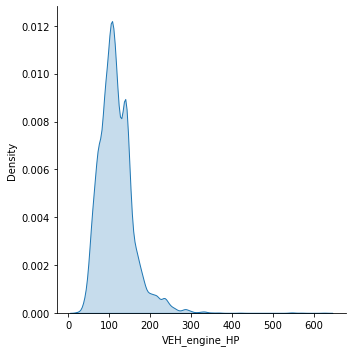

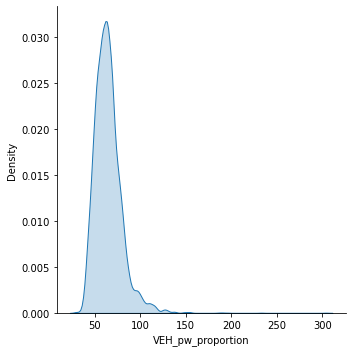

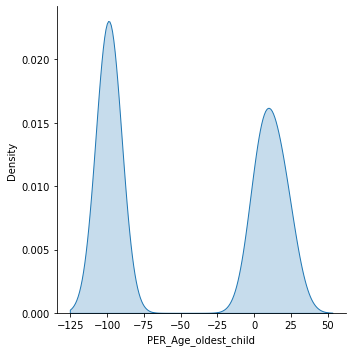

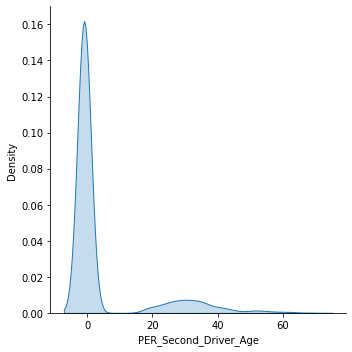

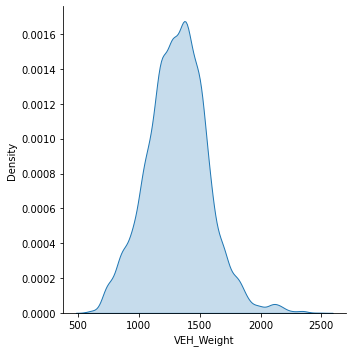

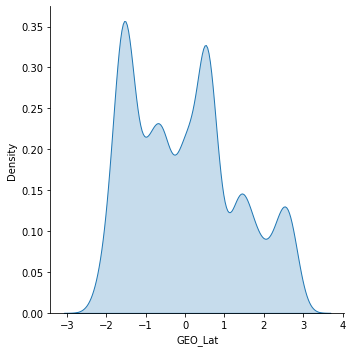

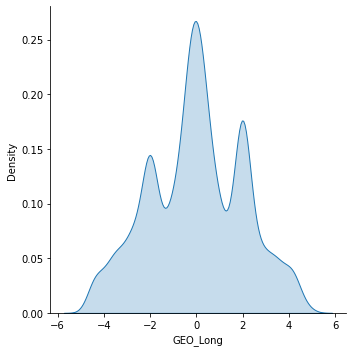

In [ ]:
#we want to check the shape of the density of each variables.

for col in list(numerical):
    sn.displot(df, x=col, fill=True, kind="kde")
    plt.show()

-The target, Vehicule Actual Value, Age Main Driver, License Age Main Driver ( Second Driver too), Vehicule Age, Vehicule Engine HP, Second Driver Age, all have right-skewed distribution.

-Vehicule Top Speed, pw_Proporting, and Weight, have gaussian distributions.

-Age Oldest Child has a bimodal gaussian distribution (two peaks). 

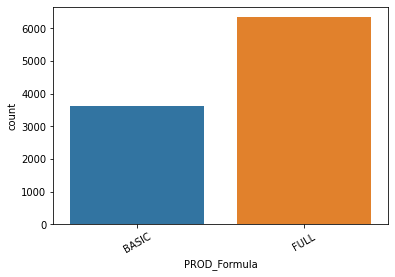

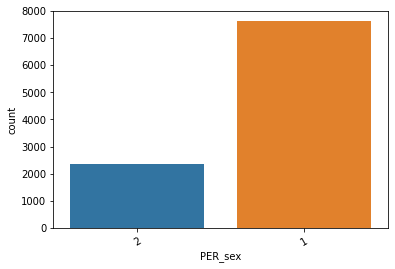

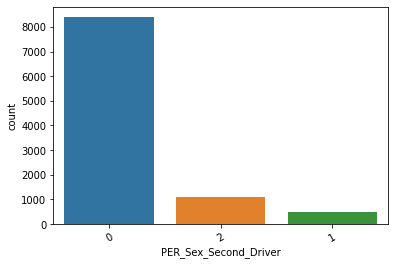

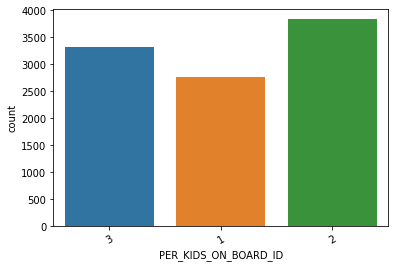

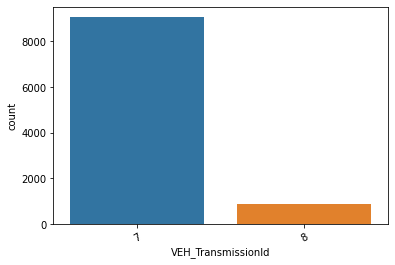

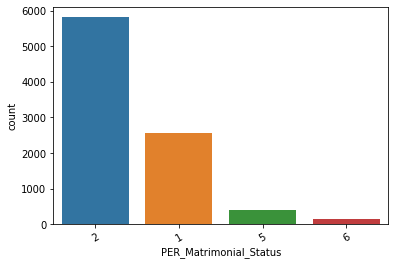

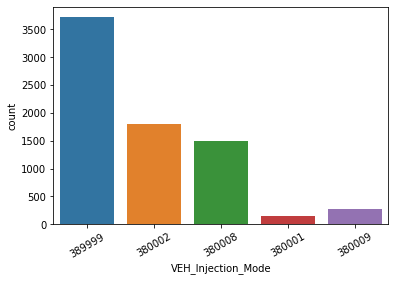

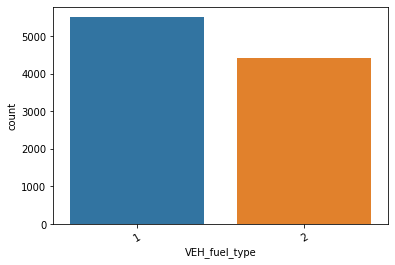

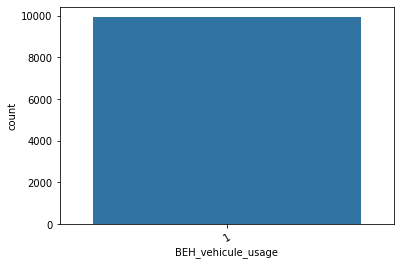

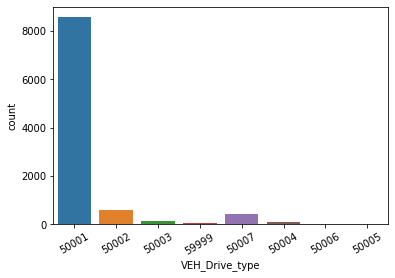

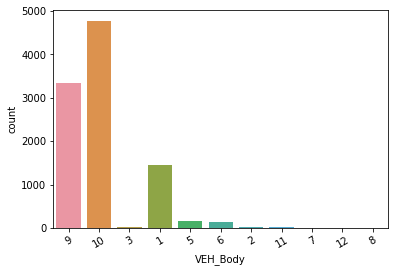

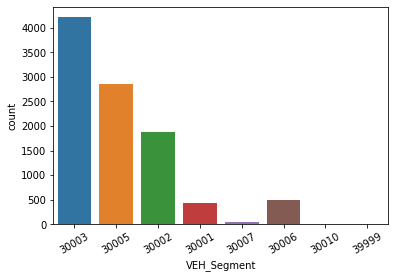

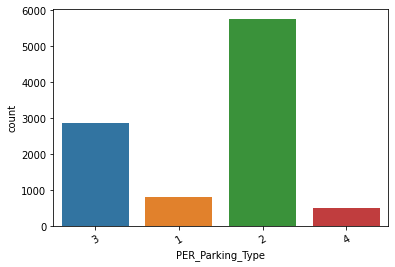

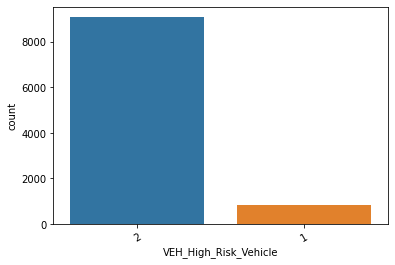

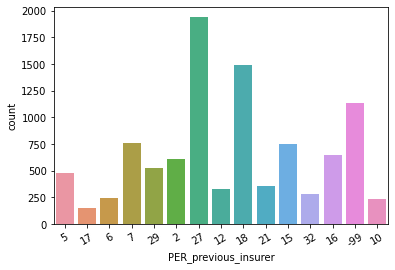

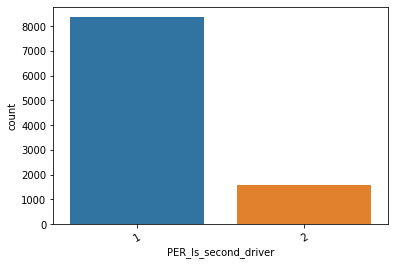

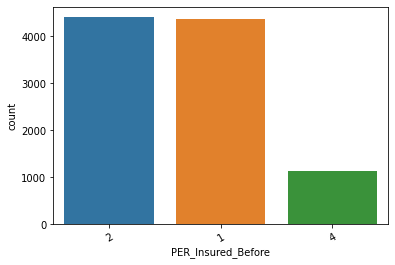

In [ ]:
for cat in categorical:
  if (cat != 'Id'):
    sn.countplot(data = df, x = cat)
    plt.xticks(rotation=30)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


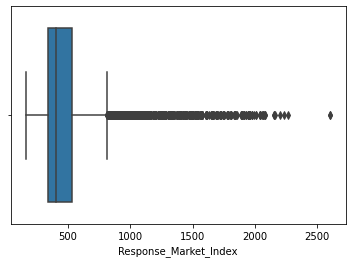

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


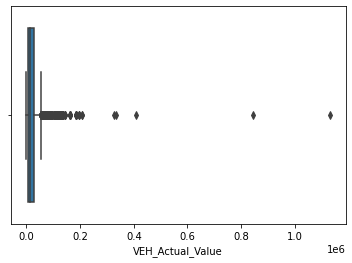

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


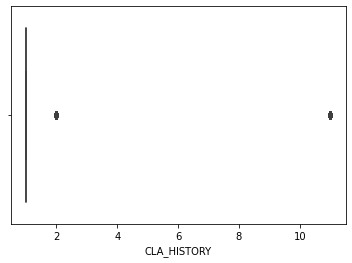

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


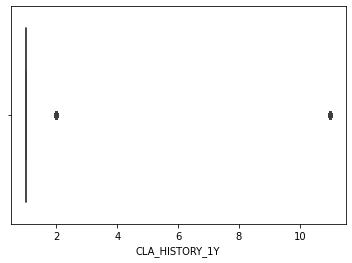

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


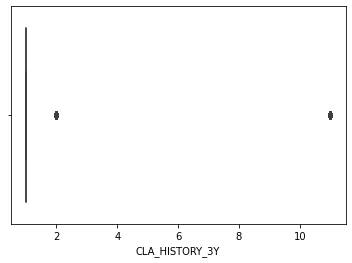

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


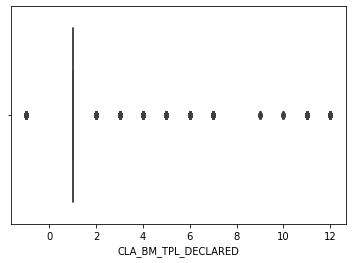

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


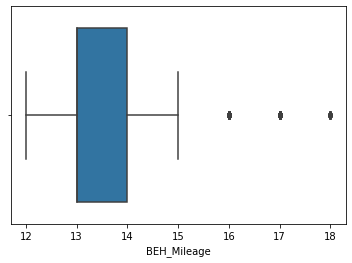

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


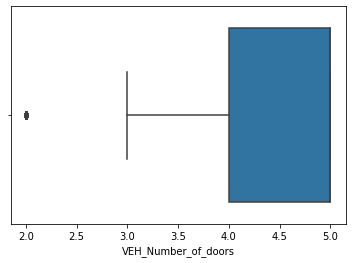

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


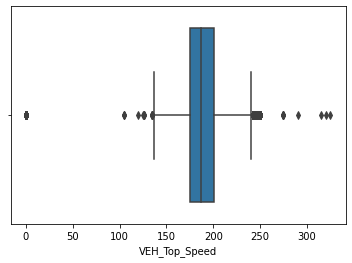

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


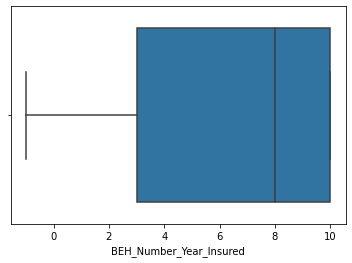

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


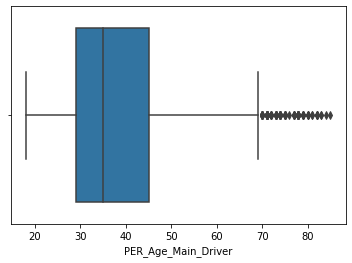

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


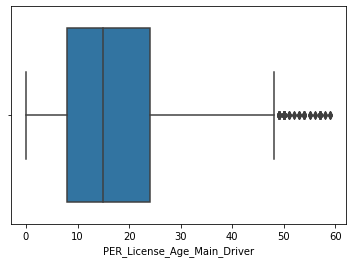

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


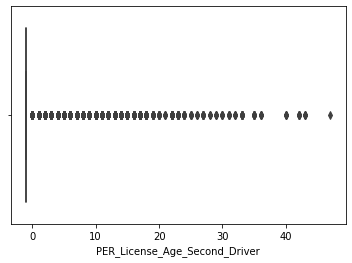

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


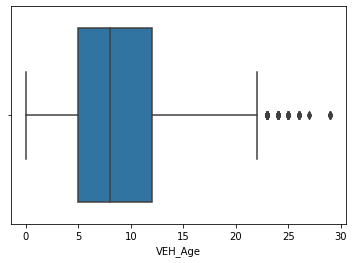

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


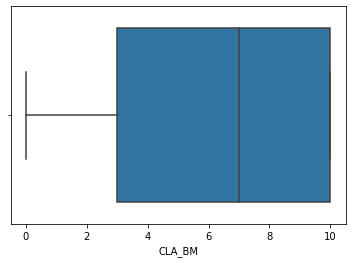

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


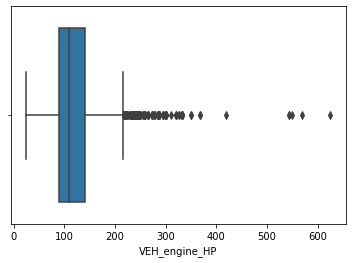

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


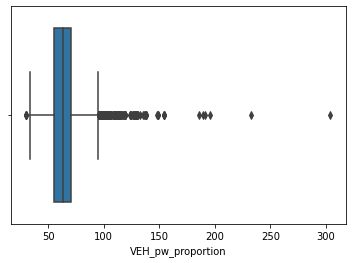

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


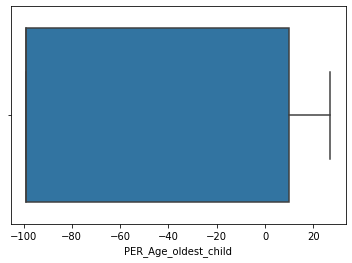

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


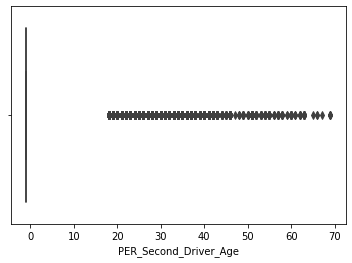

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


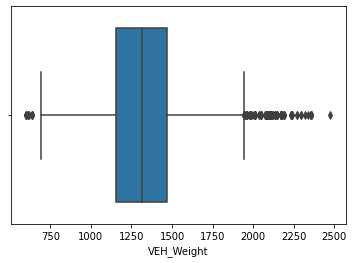

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


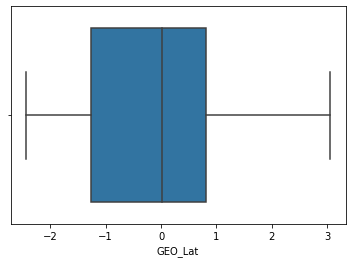

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


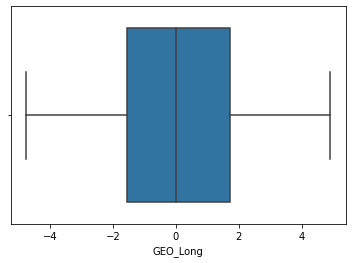

In [ ]:
#we want to check how are points distributed for each variables, and check potential outliers that could hinder our analysis later.

for col in list(numerical):
    sn.boxplot(df[col])
    plt.show()

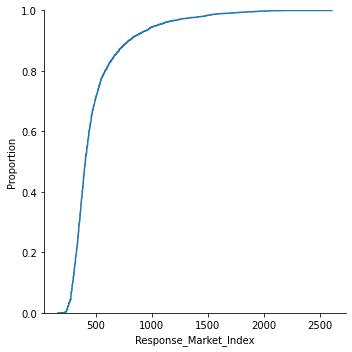

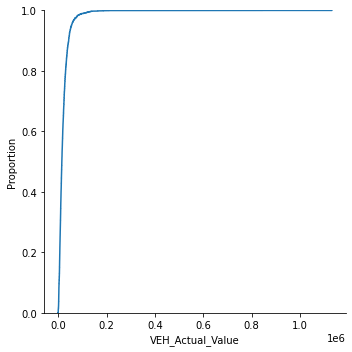

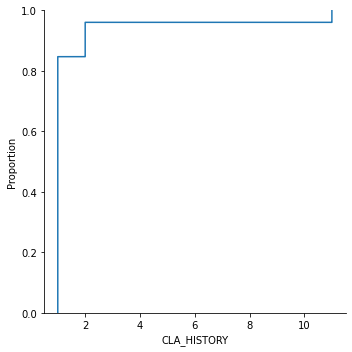

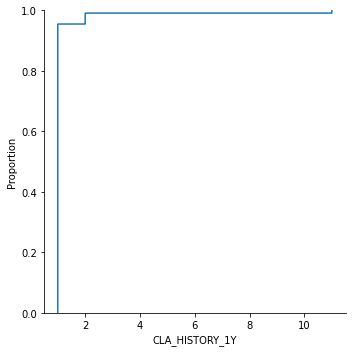

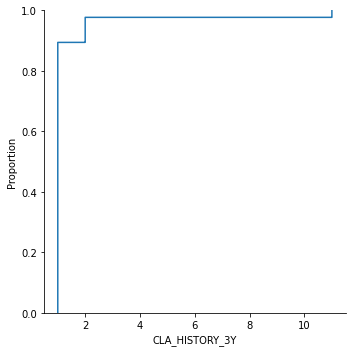

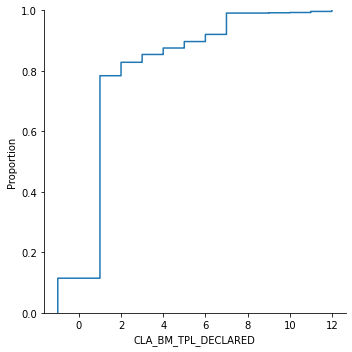

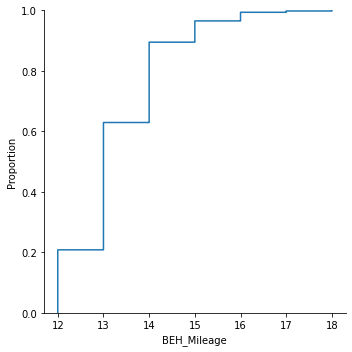

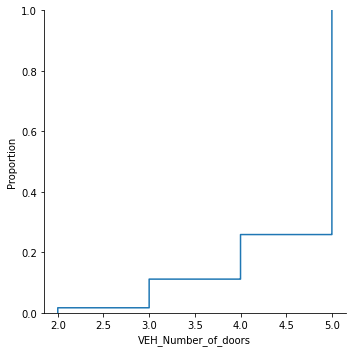

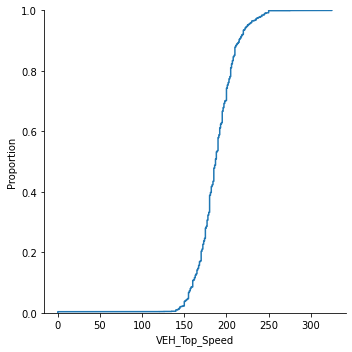

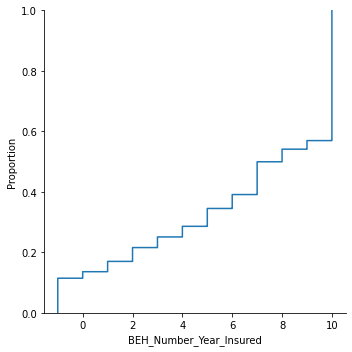

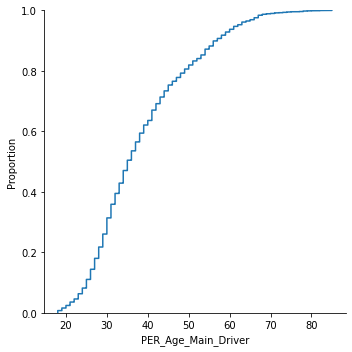

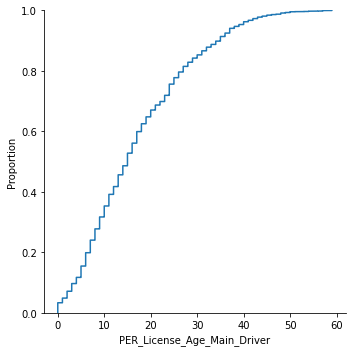

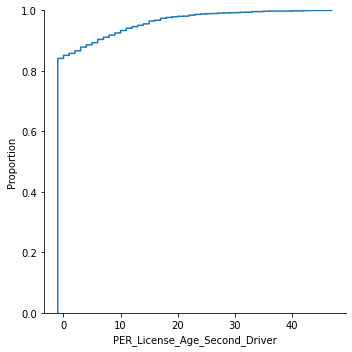

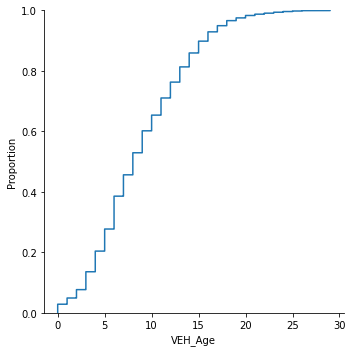

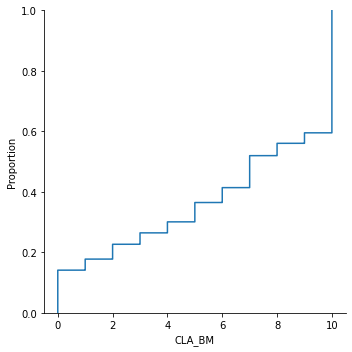

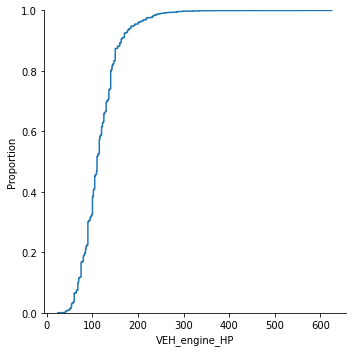

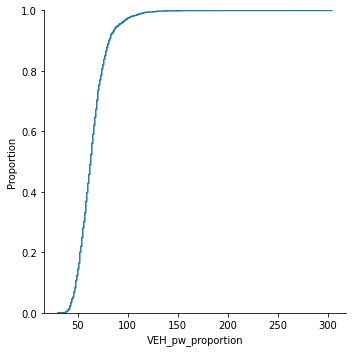

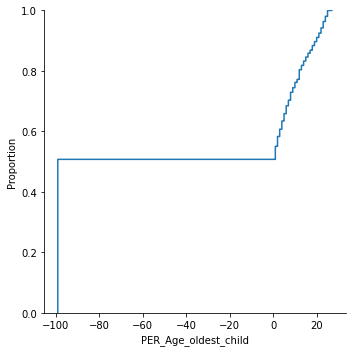

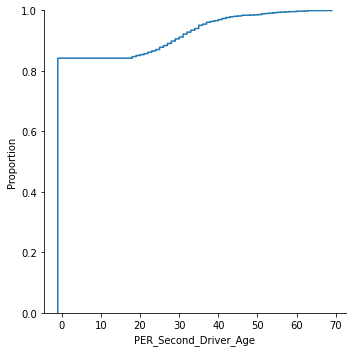

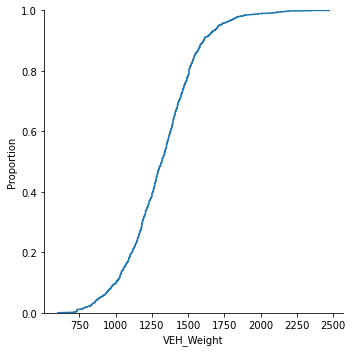

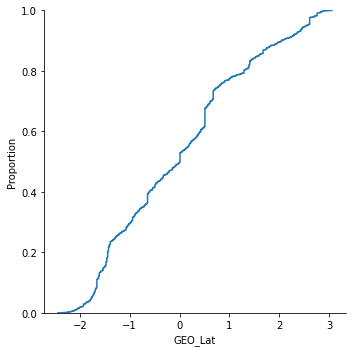

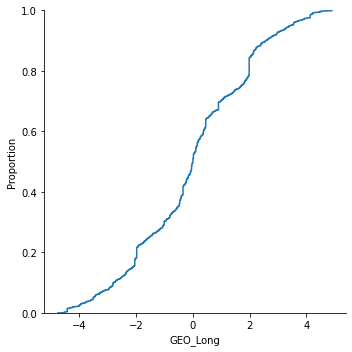

In [ ]:
#let's check cumulative distributions
for col in list(numerical):
    sn.displot(df, x=col, kind="ecdf")
    plt.show()

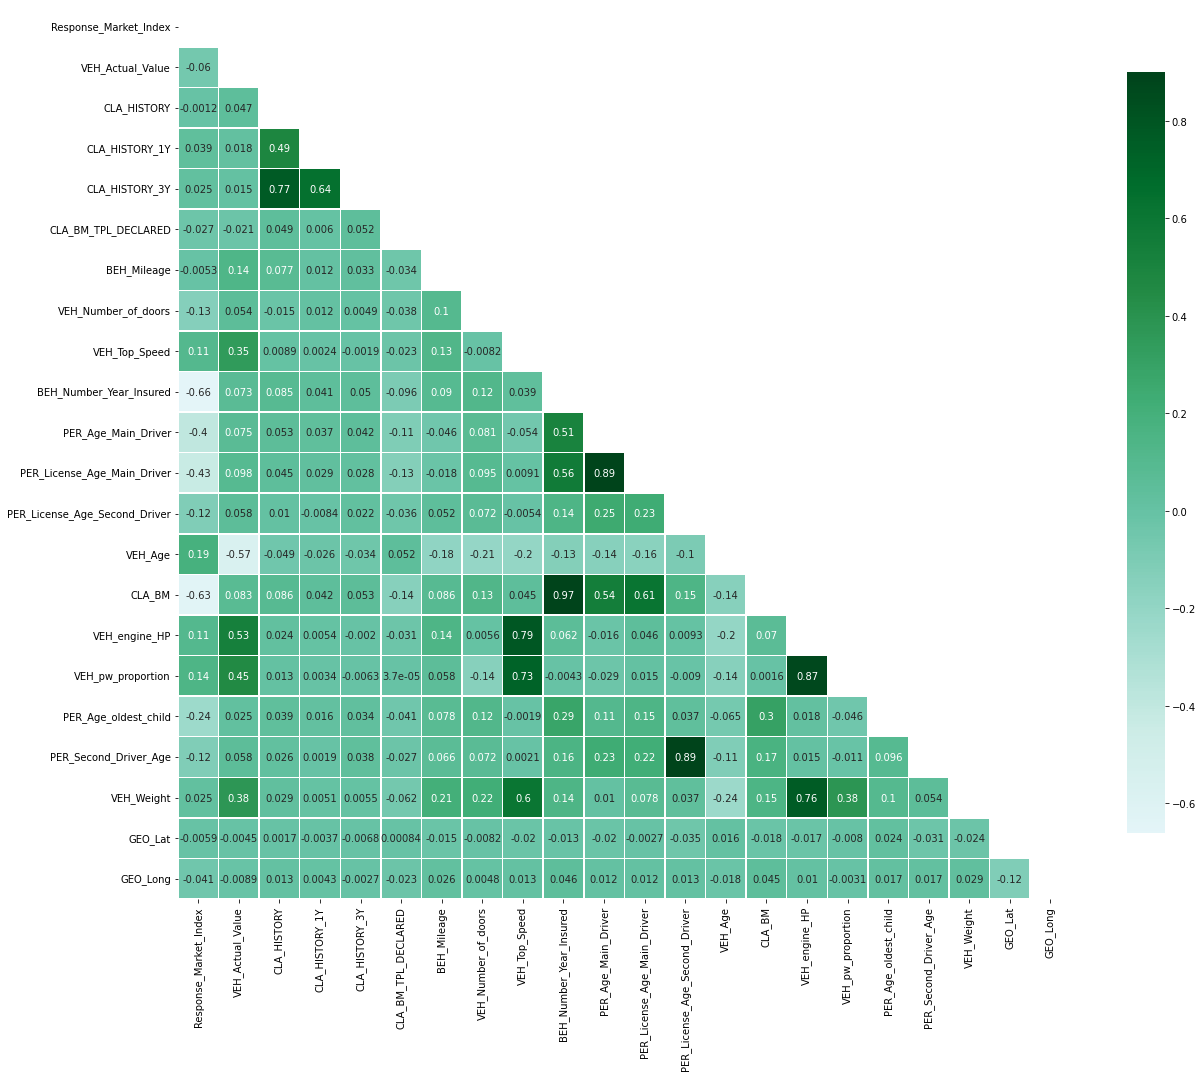

In [ ]:
#Multivariate Analysis

#we check corellations between features and target

corr = df.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (20,20))
mask = np.triu(np.ones_like(corr, dtype=bool))
sn.heatmap(corr, mask=mask, vmax = 0.9, cmap='BuGn', square = True, annot = True, linewidths=.5, cbar_kws={"shrink": .7}, center=0) 

Arbitrarily, we'll suppose that corellations between 0.3 and 0.6 are moderate, and corellations > 0.6 are strong; that'll be our thresholds.

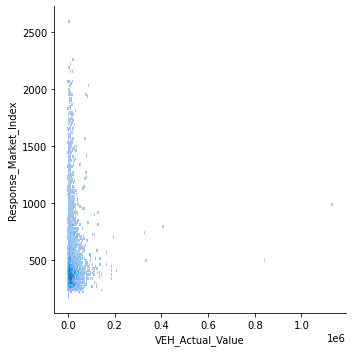

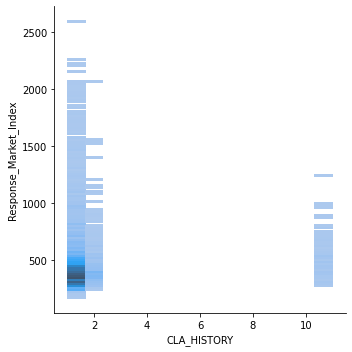

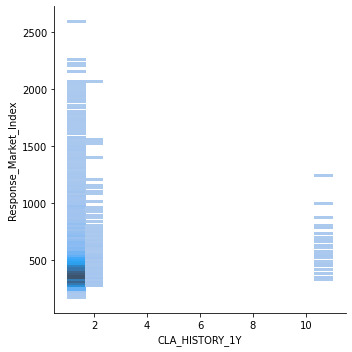

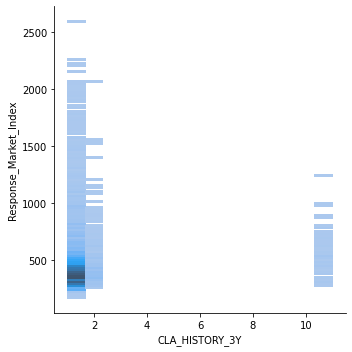

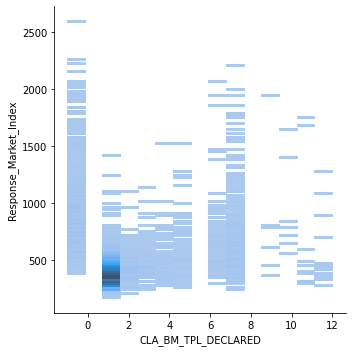

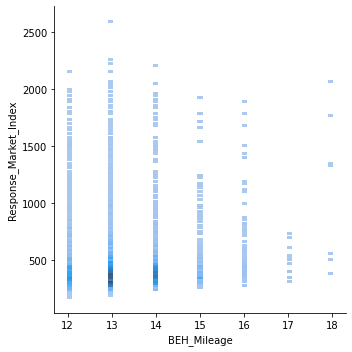

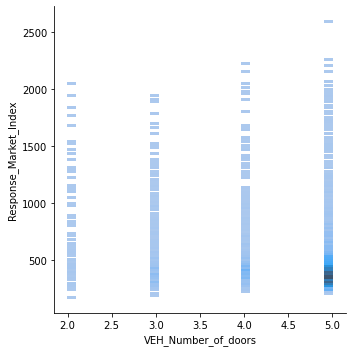

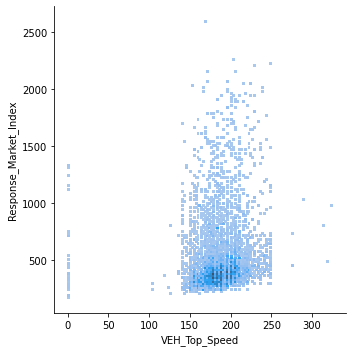

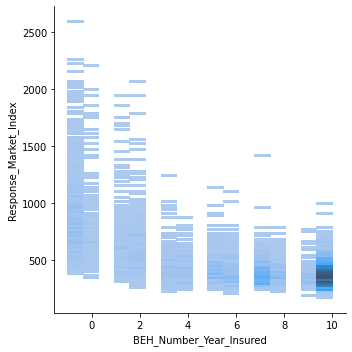

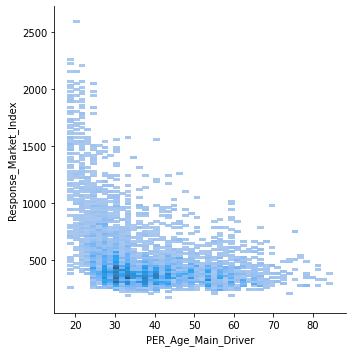

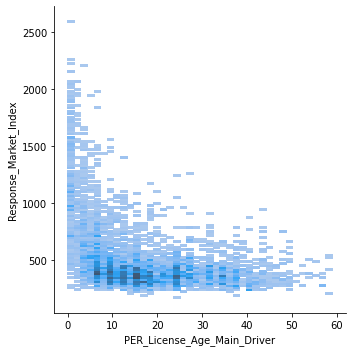

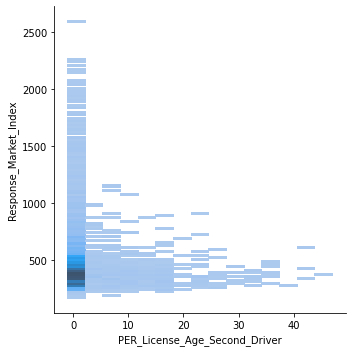

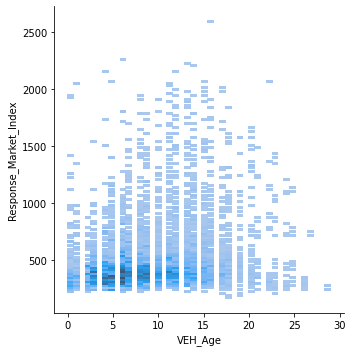

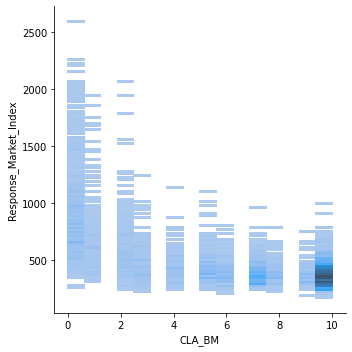

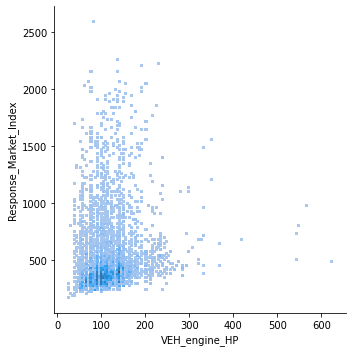

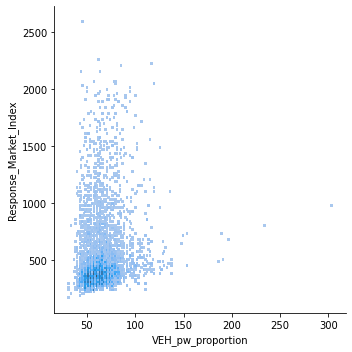

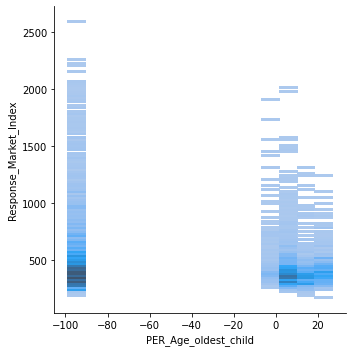

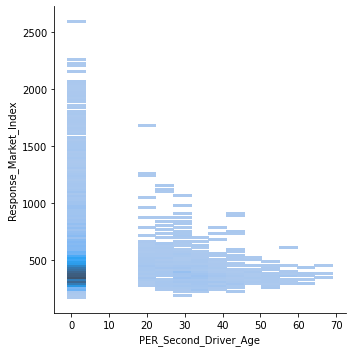

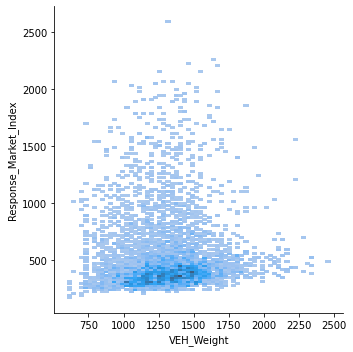

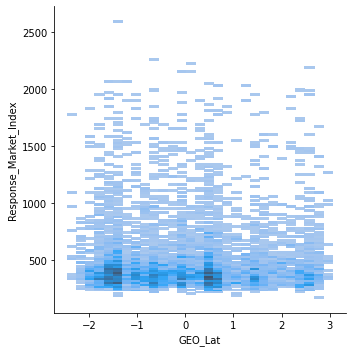

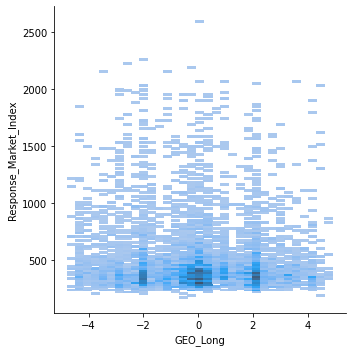

In [ ]:
#we visualize distributions between features and target
for col in list(numerical):
  if (col != 'Response_Market_Index'):
    sn.displot(df, x=col, y="Response_Market_Index")
    plt.show()


In [ ]:
# remplacement valeurs manquantes par la moyenne pour les variables numériques
df.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)

# remplacement valeurs manquantes par le mode pour les variables catégorielles
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [ ]:
#vérification
df.isnull().sum(axis=0).reset_index()

,index,0
0,Id,0
1,Response_Market_Index,0
2,PROD_Formula,0
3,PER_sex,0
4,PER_Sex_Second_Driver,0
5,VEH_Actual_Value,0
6,CLA_HISTORY,0
7,CLA_HISTORY_1Y,0
8,CLA_HISTORY_3Y,0
9,CLA_BM_TPL_DECLARED,0


In [ ]:
#we drop ID variable cause it's useless, every observations has an unique ID. That will improve the quality of our modelling.
df=df.drop(columns=["Id"])

In [ ]:
#PROD_Formula is String type, so we transform it into numerical variable for models to work
enc = OrdinalEncoder()
enc.fit(df[["PROD_Formula"]])
df[["PROD_Formula"]] = enc.transform(df[["PROD_Formula"]])

In [ ]:
#We convert Object type to Float, for our models to work
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Response_Market_Index          9983 non-null   float64
 1   PROD_Formula                   9983 non-null   float64
 2   PER_sex                        9983 non-null   float64
 3   PER_Sex_Second_Driver          9983 non-null   float64
 4   VEH_Actual_Value               9983 non-null   float64
 5   CLA_HISTORY                    9983 non-null   float64
 6   CLA_HISTORY_1Y                 9983 non-null   float64
 7   CLA_HISTORY_3Y                 9983 non-null   float64
 8   CLA_BM_TPL_DECLARED            9983 non-null   float64
 9   BEH_Mileage                    9983 non-null   float64
 10  PER_KIDS_ON_BOARD_ID           9983 non-null   float64
 11  VEH_Number_of_doors            9983 non-null   float64
 12  VEH_Top_Speed                  9983 non-null   f

In [ ]:
X = df[[col for col in list(df.columns) if col != 'Response_Market_Index']]
y = df.Response_Market_Index

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def median_absolute_percentage_error(y_true, y_pred): 
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
#Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
#Linear Regression
regli = LinearRegression()
regli = regli.fit(X_train,y_train)
y_pred_li = regli.predict(X_test)
y_train_pred_li = regli.predict(X_train)

In [ ]:
mean_absolute_percentage_error(y_train_pred_li, y_train)

21.230337574734673

In [ ]:
mean_absolute_percentage_error(y_pred_li, y_test)

21.782377617099254

In [ ]:
r2_score(y_train, y_train_pred_li)

0.5979046874293811

In [ ]:
r2_score(y_pred_li, y_test)

0.337997347482513

In [ ]:
#Random Forest without fine tuning
reg = RandomForestRegressor(n_estimators=100)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [ ]:
mean_absolute_percentage_error(y_train_pred, y_train)

2.8889754920482535

In [ ]:
mean_absolute_percentage_error(y_pred, y_test)

7.525835803189645

In [ ]:
r2_score(y_train, y_train_pred)

0.9852677863372575

In [ ]:
r2_score(y_pred, y_test)

0.8941507037992307

In [ ]:
mape = np.abs((y_test - y_pred) / y_test) * 100

df_y_pred = pd.DataFrame(data=y_pred, columns=['y_pred'])
df_y_test = pd.DataFrame(data=list(y_test), columns=['y_test'])
df_mape = pd.DataFrame(data=list(mape), columns=['mape'])
df_error = pd.concat([df_y_pred, df_y_test, df_mape], axis=1)
df_error.head()

,y_pred,y_test,mape
0,352.3973,352.00,0.112869
1,295.5276,280.05,5.526727
2,415.0364,384.00,8.082396
3,564.9448,729.00,22.504143
4,311.1593,309.64,0.490667


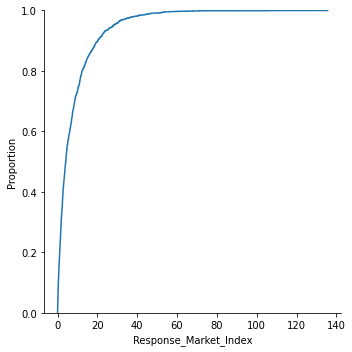

In [ ]:
#More than 80% of points have less than 20% of error
sn.displot(mape, kind="ecdf")

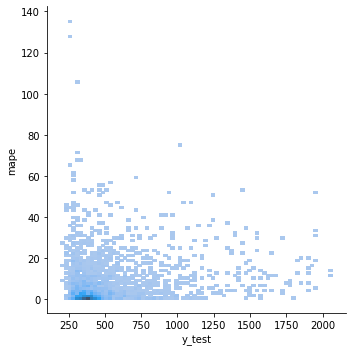

In [ ]:
#Heatmap between target values and error; most of target values are linked with low error.
sn.displot(df_error, x="y_test", y="mape")

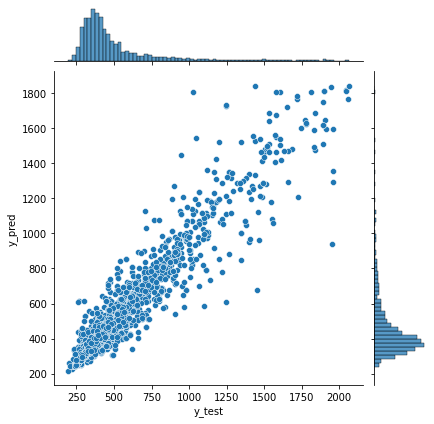

In [ ]:
sn.jointplot(data=df_error, x="y_test", y="y_pred")

In [ ]:
#XGBoost without fine tuning
xgbreg = XGBRegressor()
xgbreg = xgbreg.fit(X_train, y_train)
y_pred_xg = xgbreg.predict(X_test)
y_train_pred_xg = xgbreg.predict(X_train)

[14:59:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mean_absolute_percentage_error(y_train_pred_xg, y_train)

13.525399393757276

In [ ]:
mean_absolute_percentage_error(y_pred_xg, y_test)

14.26122154251645

In [ ]:
r2_score(y_train, y_train_pred_xg)

0.859535791484158

In [ ]:
r2_score(y_pred_xg, y_test)

0.7936513670019401

There, we'll fine tune our XGBoost model in order for it to become better than our Random Forest Model. We'll do a Random Search.

In [ ]:
#XGBoost RandomSearch (it took me 15 minutes to run the code)

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

xgbrandom = XGBRegressor(seed = 20)    

clf = RandomizedSearchCV(estimator=xgbrandom,
                         param_distributions=params,
                         scoring='neg_mean_absolute_percentage_error',
                         n_iter=25,
                         verbose=1)

clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[15:25:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:26:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:26:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:26:25] WARNING: /workspace/src/objective/regr

In [ ]:
#Let's check metrics for assessment 

xgbregtuned = XGBRegressor(subsample = 0.5, n_estimators = 500, max_depth = 15, learning_rate = 0.1, colsample_bytree = 0.5, colsample_bylevel = 0.7)
xgbregtuned = xgbregtuned.fit(X_train, y_train)
y_pred_xgtuned = xgbregtuned.predict(X_test)
y_train_pred_xgtuned = xgbregtuned.predict(X_train)

[21:53:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mean_absolute_percentage_error(y_train_pred_xgtuned, y_train)

0.15109991407161252

In [ ]:
mean_absolute_percentage_error(y_pred_xgtuned, y_test)

5.740206104328543

In [ ]:
r2_score(y_train, y_train_pred_xgtuned)

0.9999358366854304

In [ ]:
r2_score(y_pred_xgtuned, y_test)

0.904568401701087

In [ ]:
mape_xgtuned = np.abs((y_test - y_pred_xgtuned) / y_test) * 100

df_y_pred_xgtuned = pd.DataFrame(data=y_pred_xgtuned, columns=['y_pred_xgtuned'])
df_y_test = pd.DataFrame(data=list(y_test), columns=['y_test'])
df_mape_xgtuned = pd.DataFrame(data=list(mape_xgtuned), columns=['mape_xgtuned'])
df_error_xgtuned = pd.concat([df_y_pred_xgtuned, df_y_test, df_mape_xgtuned], axis=1)
df_error_xgtuned.head()

,y_pred_xgtuned,y_test,mape_xgtuned
0,351.956879,352.00,0.012250
1,286.317474,280.05,2.237984
2,421.941406,384.00,9.880575
3,571.514160,729.00,21.602996
4,309.676086,309.64,0.011654


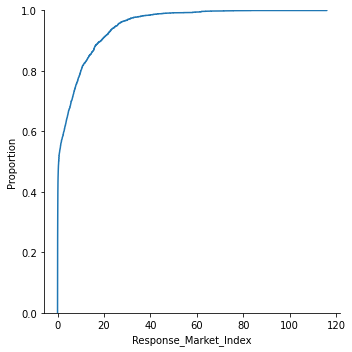

In [ ]:
#MAround 90% of points have less than 20% of error
sn.displot(mape_xgtuned, kind="ecdf")

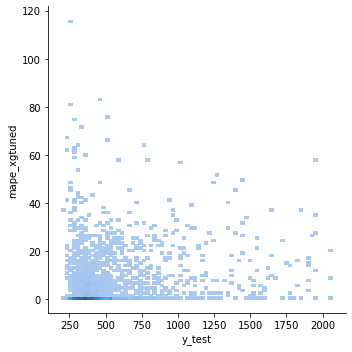

In [ ]:
#Heatmap between target values and error; most of target values are linked with low error.
sn.displot(df_error_xgtuned, x="y_test", y="mape_xgtuned")

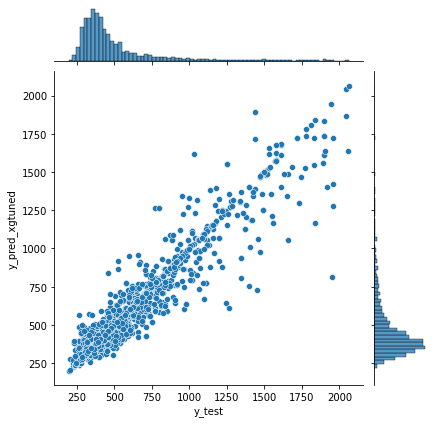

In [ ]:
sn.jointplot(data=df_error_xgtuned, x="y_test", y="y_pred_xgtuned")

Even if our model performs way better on our train dataset, it still performs well on the test dataset aswell ( way better than our linear regression and random forest model) . We'll work with this fine tuned XGBoost model where RandomSearch Algorithm has been used.

Text(0.5, 0, 'Relative Importance')

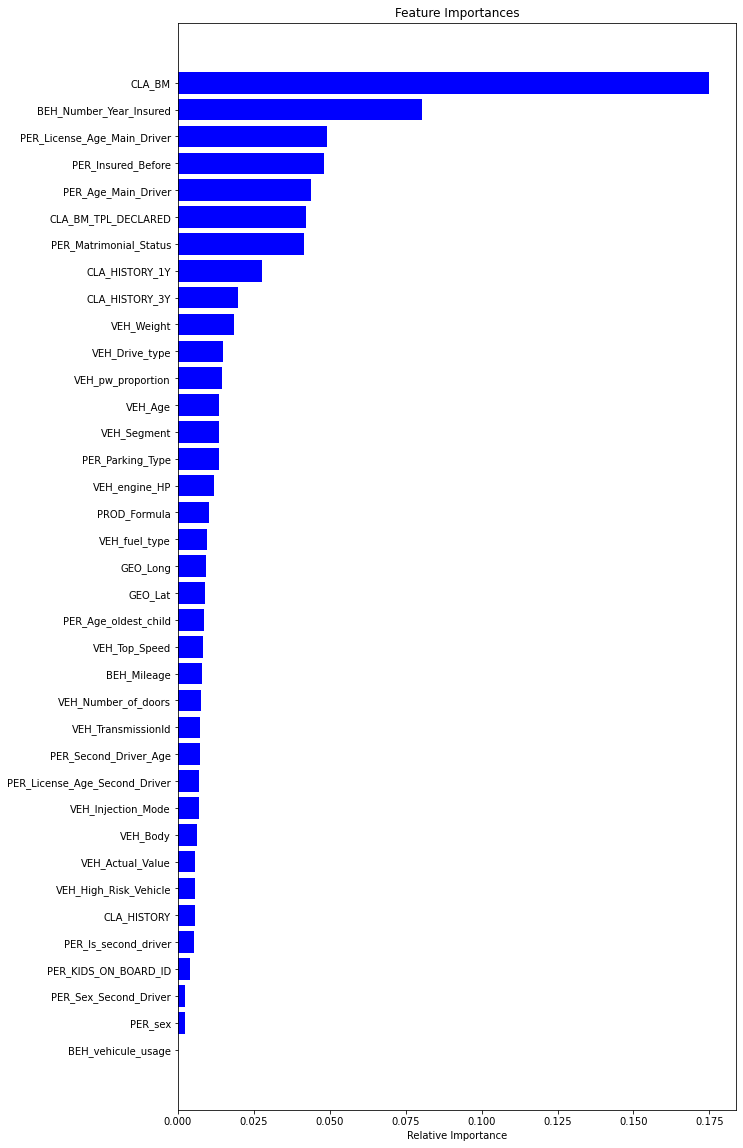

In [ ]:
#Feature Importance

features = np.array(X_train.columns)
importances = xgbregtuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,20))
plt.title('Feature Importances')
nf = 50
plt.barh(range(len(indices))[-nf:-1], importances[indices][-nf:-1], color='b', align='center')
plt.yticks(range(len(indices))[-nf:-1], features[indices][-nf:-1])
plt.xlabel('Relative Importance')

By looking at the Feature Importance Plot, we can see that there might be way to improve the model (+speed, - loss of accuracy) by reducing number of features for examples.

Exercice 3: Interprétabilité/Shap

In [ ]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP (code takes around 10 minutes)
explainer = shap.TreeExplainer(xgbregtuned)
shap_values = explainer.shap_values(X_test)

# first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

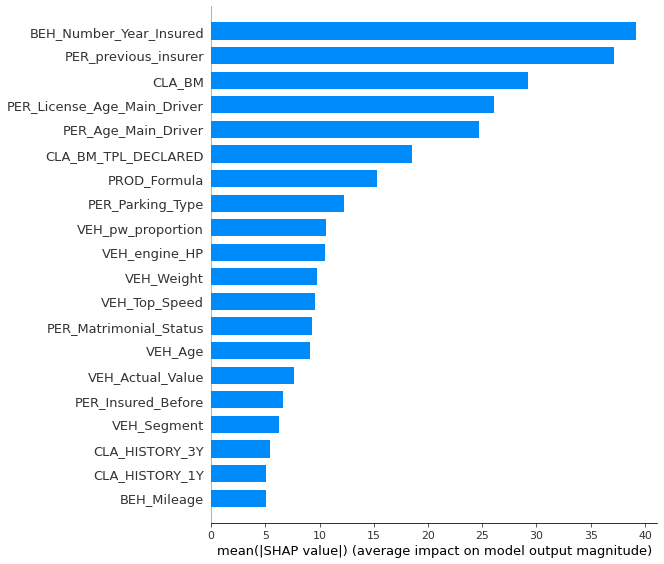

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

We can see that the *BEH_Number_Year_Insured* feature is actually the most important, followed by *PER_previous_insurer* feature. Now, lets' plot the feature importance for every customer in our data set

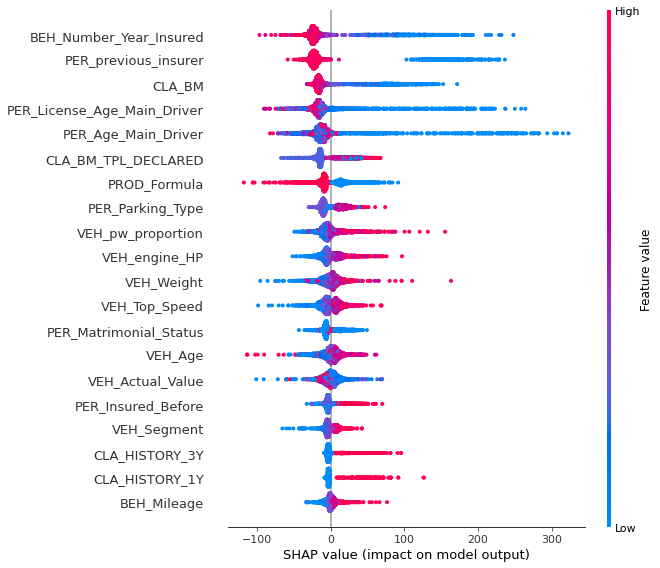

In [ ]:
shap.summary_plot(shap_values, X_test)

Features are sorted by mean(|SHAP Value|) and so we again see the *BEH_Number_Year_Insured* feature as the strongest predictor for the target. 

The x position of the dot is the impact of that feature on the model’s prediction for the target, and the color of the dot represents the value of that feature for the target.

This plot allows us to see important outlier effects. For example, Formula is not the most important feature, but the coloring shows us that the Full Formula has a clear negative impact on the target, while the Basic Formula has a positive impact on the target.


In [ ]:
#+

X_train, X_test, y_train, y_test = train_test_split(X_dummified, y, test_size=0.33, random_state=0)

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression


rf = RandomForestClassifier(random_state=0)
xg = XGBClassifier(random_state=0)
lr = LogisticRegression()

model_rf = rf.fit(X_train, y_train)
model_xg = xg.fit(X_train, y_train)
model_lr = lr.fit(X_train, y_train)

y_pred = model_rf.predict_proba(X_test)
y_pred_train = model_rf.predict(X_train)

y_pred_xg = model_rf.predict(X_test)
y_pred_train_xg = model_rf.predict(X_train)


y_pred_lr = model_lr.predict_proba(X_test)
y_pred_train_lr = model_lr.predict_proba(X_train)

In [ ]:
y_pred_train_lr

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve, accuracy_score, balanced_accuracy_score, plot_roc_curve, plot_confusion_matrix

precision, recall, threshold = precision_recall_curve(y_pred_train, y_train)
plt.step(recall, precision, where='post')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.grid();
plt.show()

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_rf, X_train, y_train)

In [ ]:
precision, recall, threshold = precision_recall_curve(y_pred, y_test)
plt.step(recall, precision, where='post')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.grid();
plt.show()

print (accuracy_score(y_pred, y_test))
print (balanced_accuracy_score(y_pred, y_test))

plot_confusion_matrix(model_rf, X_test, y_test)
plot_roc_curve(model_rf, X_test, y_test)

In [ ]:
precision, recall, threshold = precision_recall_curve(y_pred_lr, y_test)
plt.step(recall, precision, where='post')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.grid();
plt.show()

print (accuracy_score(y_pred_lr, y_test))
print (balanced_accuracy_score(y_pred_lr, y_test))

plot_confusion_matrix(model_lr, X_test, y_test)
plot_roc_curve(model_lr, X_test, y_test)



In [ ]:
precision, recall, threshold = precision_recall_curve(y_pred_xg, y_test)
plt.step(recall, precision, where='post')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.grid();
plt.show()

print (accuracy_score(y_pred_xg, y_test))
print (balanced_accuracy_score(y_pred_xg, y_test))

plot_confusion_matrix(model_xg, X_test, y_test)
plot_roc_curve(model_xg, X_test, y_test)

In [ ]:
features = np.array(X_train.columns)
importances = model_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,20))
plt.title('Feature Importances')
nf = 50
plt.barh(range(len(indices))[-nf:-1], importances[indices][-nf:-1], color='b', align='center')
plt.yticks(range(len(indices))[-nf:-1], features[indices][-nf:-1])
plt.xlabel('Relative Importance')

In [ ]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

# Create classifiers
dc = DummyClassifier(strategy='stratified', random_state=0)
rf = RandomForestClassifier(random_state=0)
xg = XGBClassifier(random_state=0)
lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)

# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(rf, 'Random Forest'), 
                  (dc, 'Dummy'), 
                  (xg, 'XGBoost')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()